Please  note that this implementation is not yet completed and is subject to future changes.

This notebook includes implementation EDA visuals and code to train several models: support vector machine, decision tree, adaboost, and random forest. The plan is to either condense this code to only implement one model or to implement several, but evaluate which is the best model. After that is completed, we will move on to write code for examining trends in google searches. This trend-related code has not yet been implemented. We also may make changes to the visuals to display more temporal information.

This code utilized a dataset we found on Kaggle, but we plan on changing the dataset we refer to to one we found on paperswithcode.com. This new dataset and its strengths are detailed in our proposal.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Covid-19 Fake News Detection System

In [ ]:
### importing the libraries ###

import numpy as np
import pandas as pd

import re
import string
import numpy as np

import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

from tqdm.autonotebook import tqdm

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

### Data Exploration

In [ ]:
path="/content/drive/My Drive/DS340/Constraint_Train.csv"
df = pd.read_csv(path)
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
df.shape

(6420, 3)

### Data Cleaning

In [ ]:
### Checking null values ###
df["label"].isnull().sum()

0

In [ ]:
df.drop("id", axis=1, inplace=True)

In [ ]:
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [ ]:
# encoding the labels

df["label"] = df.label.map({"real":0, "fake":1})

In [ ]:
### Vectorizing the text ###

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(lowercase=False) # we will use it in the model building

### Data Visualization

In [ ]:
### function for plotting the bar chart ###

def bar_chart(col):
    real = df[df["label"]==0][col].value_counts()
    fake = df[df["label"]==1][col].value_counts()

    df1 = pd.DataFrame([real, fake])
    df1.index = ["real", "fake"]
    df1.plot(kind="bar")

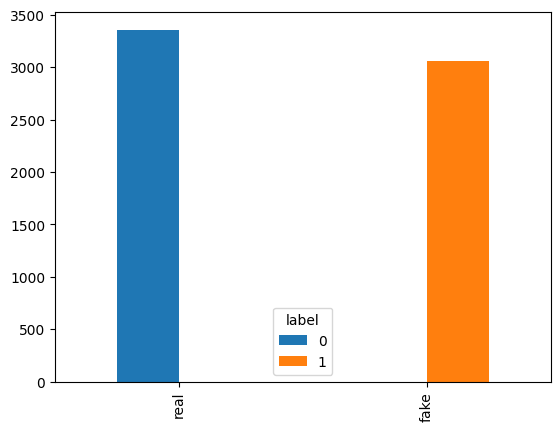

In [ ]:
bar_chart("label")

In [ ]:
words =list( df['tweet'].values)
stopwords=['ourselves', 'hers','the','of','and','in', 'between', 'yourself', 'but', 'again','of', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
split_words=[]
for word in words:
    lo_w=[]
    list_of_words=str(word).split()
    for w in list_of_words:
        if w not in stopwords:
            lo_w.append(w)
    split_words.append(lo_w)
allwords = []
for wordlist in split_words:
    allwords += wordlist

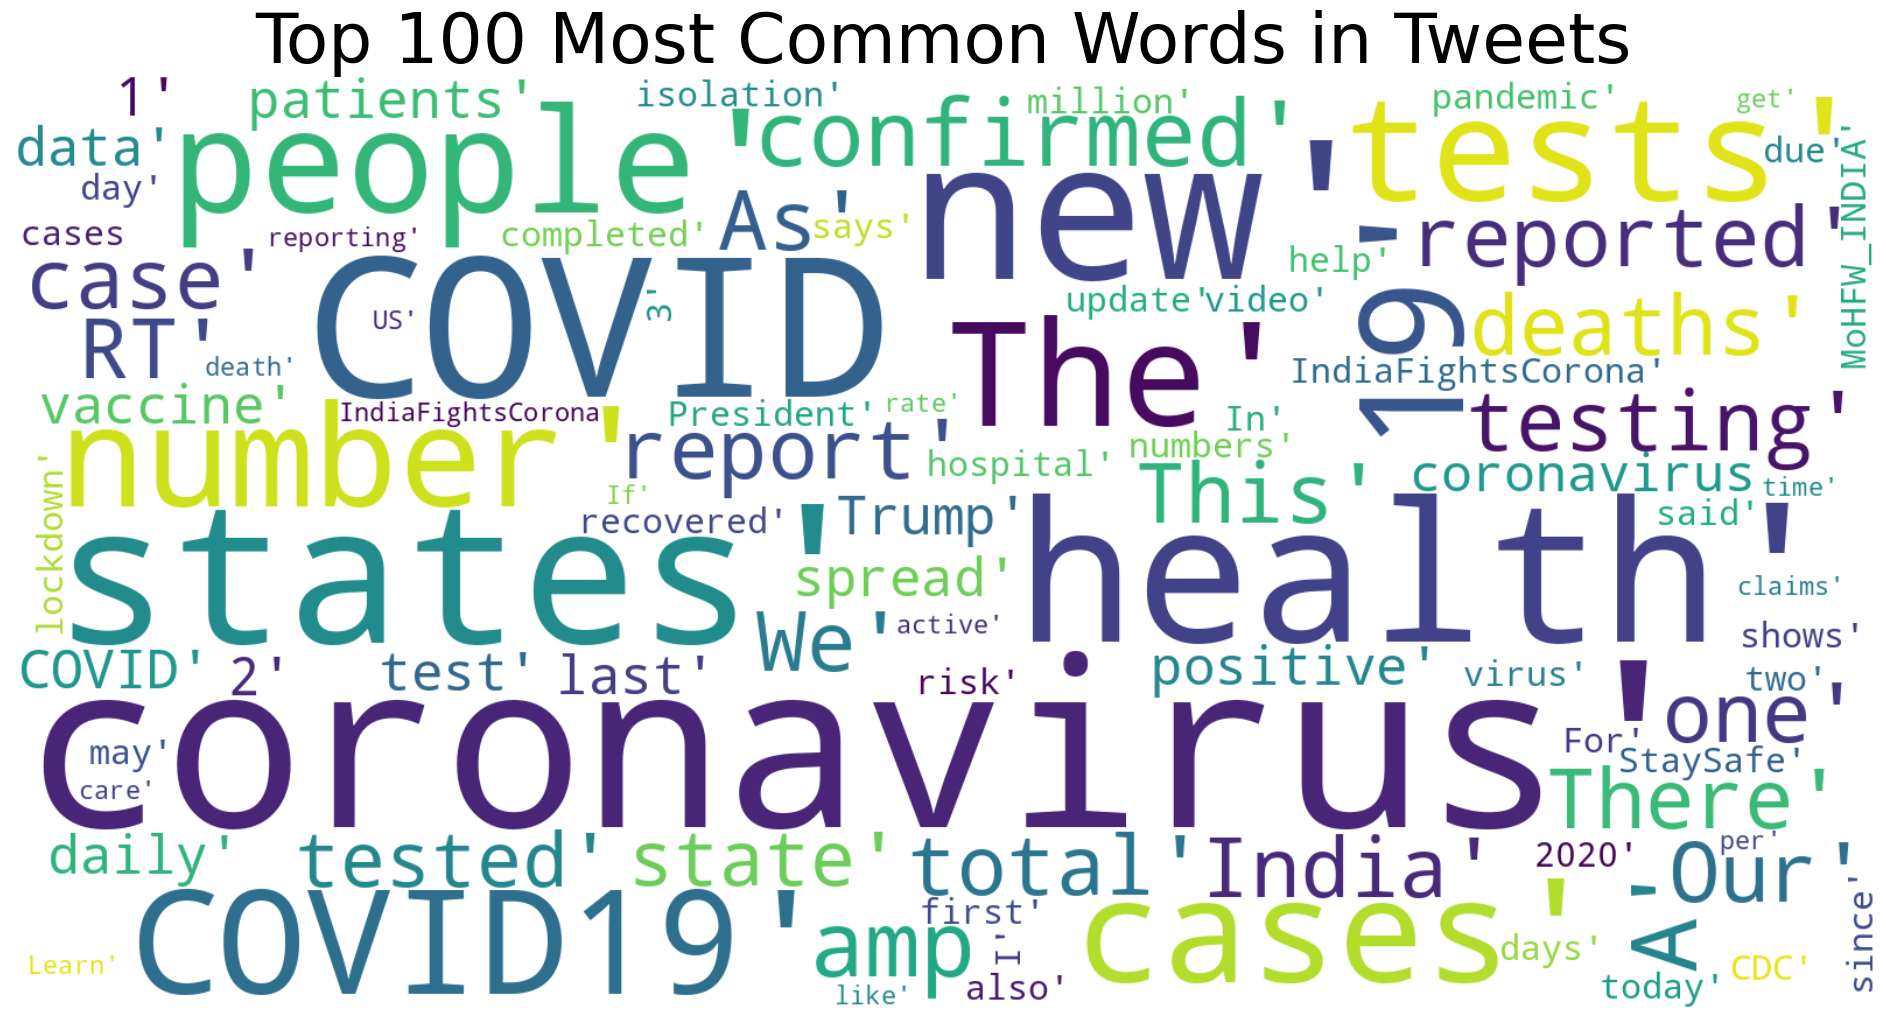

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Tweets', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Model Development

In [ ]:
X = df["tweet"].values
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)

In [ ]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(training_data, y_train)
pred = lr.predict(testing_data)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm_clf = SVC(gamma='auto')
svm_clf.fit(training_data, y_train)
pred1 = svm_clf.predict(testing_data)

In [ ]:
from sklearn.tree import DecisionTreeClassifier , export_graphviz

dtc_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc_clf.fit(training_data, y_train)
pred2 = dtc_clf.predict(testing_data)

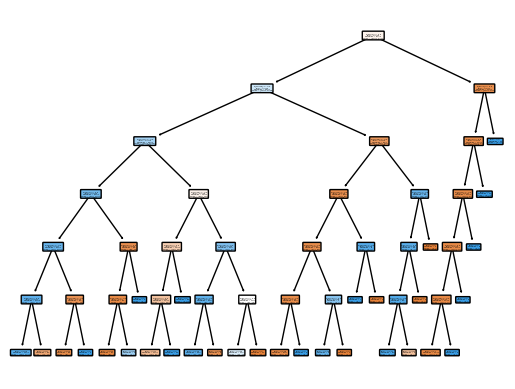

In [ ]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtc_clf
                     ,
                     class_names =["real", "fake"] , filled = True ,  rounded = True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(training_data, y_train)

pred3 = rnd_clf.predict(testing_data)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(training_data, y_train)

pred4 = ada_clf.predict(testing_data)

In [ ]:
### Accuracy Scores ###

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(pred,y_test)
acc1

0.9345794392523364

In [ ]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(pred1,y_test)
acc2

0.6588785046728972

In [ ]:
acc3 = accuracy_score(pred2,y_test)
acc3

0.8333333333333334

In [ ]:
acc4 = accuracy_score(pred3,y_test)
acc4

0.8847352024922118

In [ ]:
acc5 = accuracy_score(pred4,y_test)
acc5

0.9096573208722741